# Part 3 - Progress Report

After setting loose the scrapers, the reviews came cascading in.

## Rating by Review Counts
The Number of reviews per product category:

SLR Cameras: 26118  
Beers, Wines & Sprirts: 101833  
Playmobil: 22245  
Men's Trainers: 15538  

Initially this felt like plenty of data to use for generating the models, however in breaking dow the data further, I realised that I may have a problem on my hands

<div style="width:900px;">
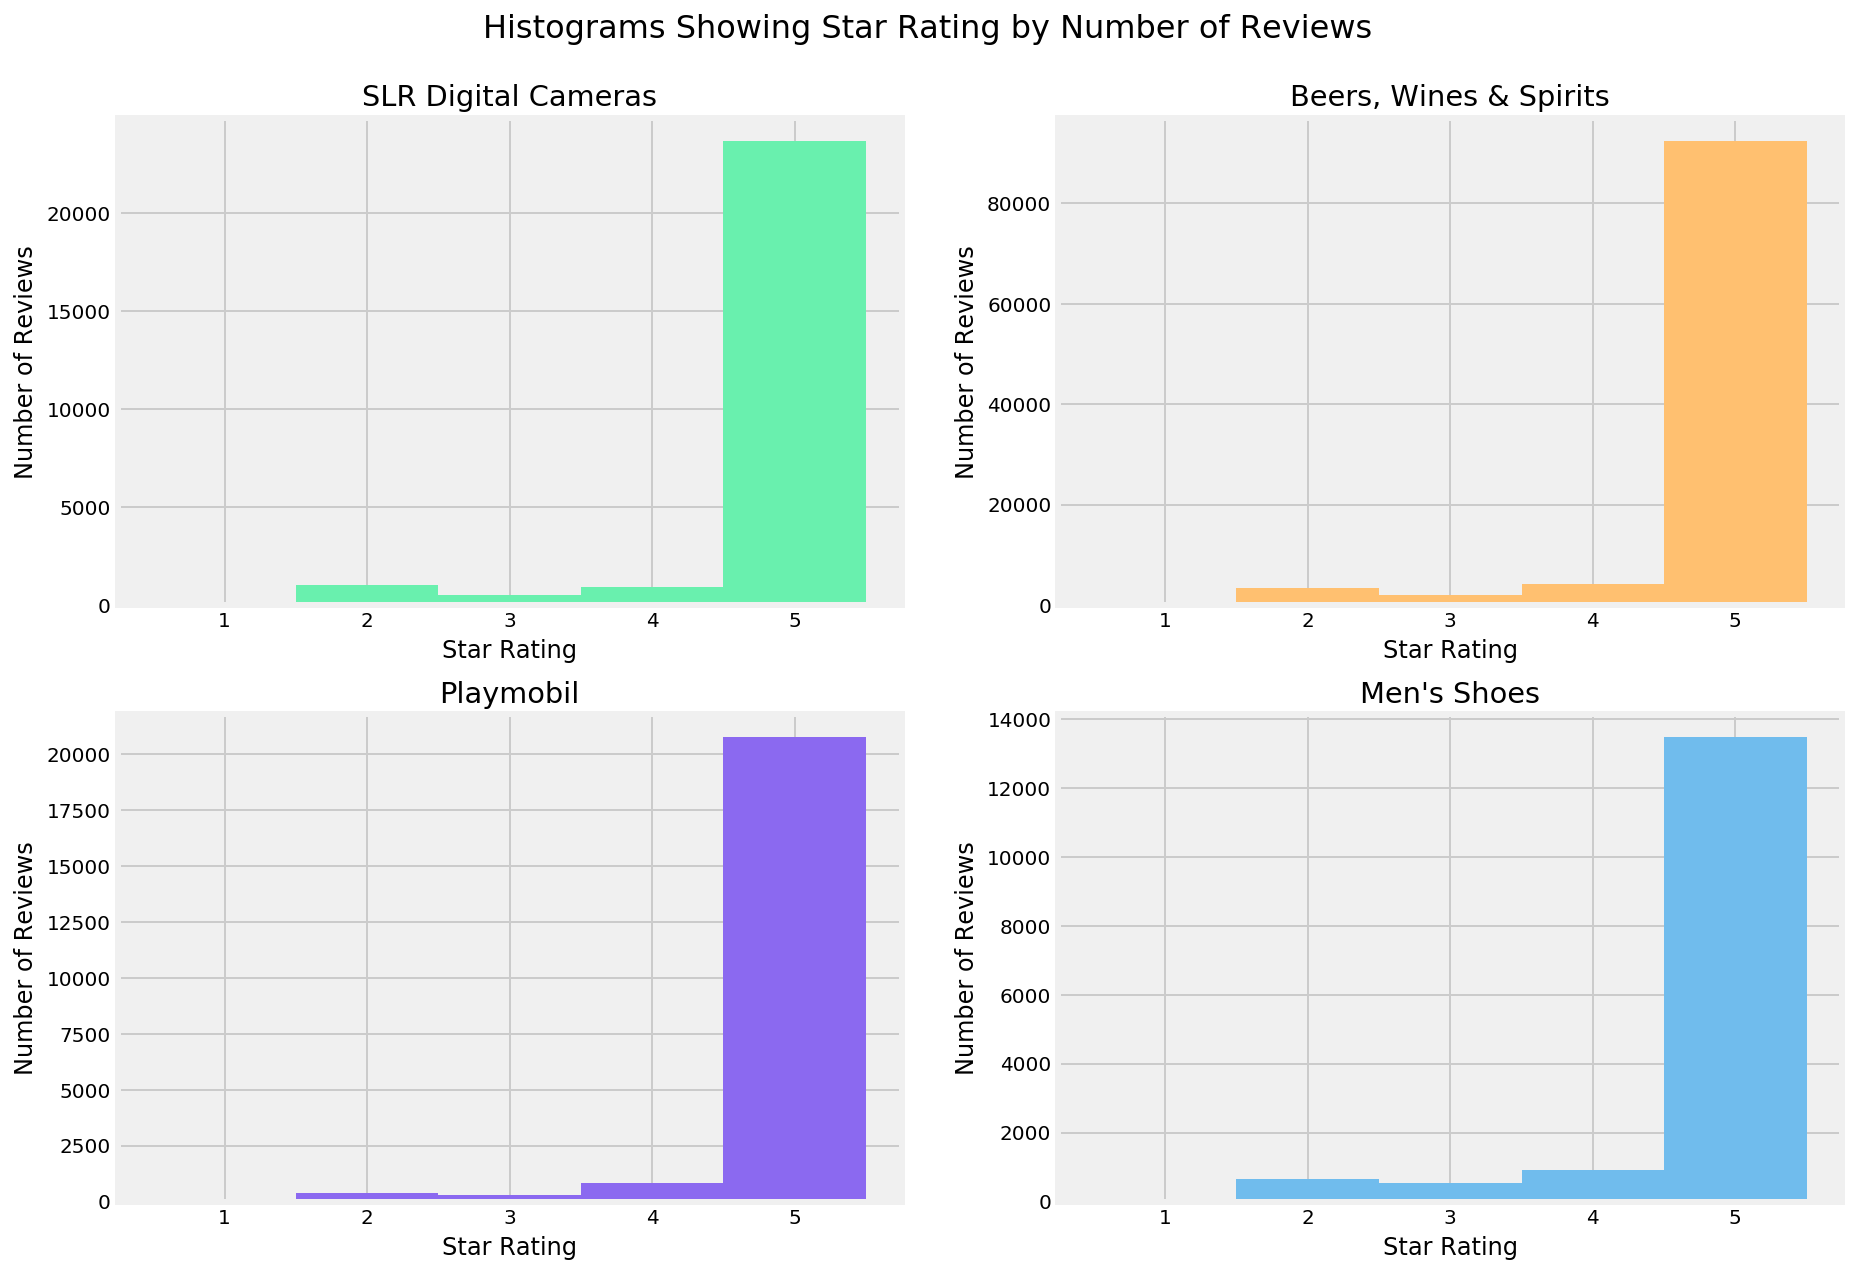
</div>

We can see that for the 4 categories chosen there is a really high proportion of 5 star reviews given, and very few 1 star reviews given. As a percentage of Reviews, 1 star reviews make up of all reviews in that category: 

SLR Digital Cameras: 3.9%  
Beers, Wines & Spirits: 3.3%  
Playmobil: 1.7%  
Men's Shoes: 4.1%  

In comparison, the 5 Star Reviews make up:

SLR Digital Cameras: 78.1%  
Beers, Wines & Spirits: 80.4%  
Playmobil: 79.8%  
Men's Shoes: 68.6%  

These high star review ratings will be the baseline that my models will need to improve upon, which will be quite some going. Even if I move to prediciting 5 star vs not 5 star, the classes are still incredibly imbalanced

Amazon defines their Star Ratings as:

1. 'I Hate It'
2. 'I Don't like it'
3. 'It's Okay'
4. 'I Like It'
5. 'I Love It'

It feels strange to me that by far and away most people 'love' the products they have purchased from Amazon, and that across four discrete product types the rating distribution looks so similar.

I'm beginning to suspect that these star ratings are not all they are cracked up to be.

My initial suspicion is that there is some sort of survivorship bias occurring here, products that garner a large proportion of one star reviews will be removed from sale by Amazon. My next suspicion is that there is perhaps a percentage of reviews that have misleading reviews - these would be reviews left by people that have not purchased the product, but given a good review in order to improve a seller's reputation or product's listing position.

I then wanted to look at the average length of a review left in comparison to the star rating, I would expect that when the emotion for a product is 'love' that a review would be longer because the customer would want to tell everyone else how goos the product really was. I would also expect that the other strong emotion of 'hate' would also lead to a longer review whilst customers vented about poor products.

## Rating by review length

<div style="width:900px;">
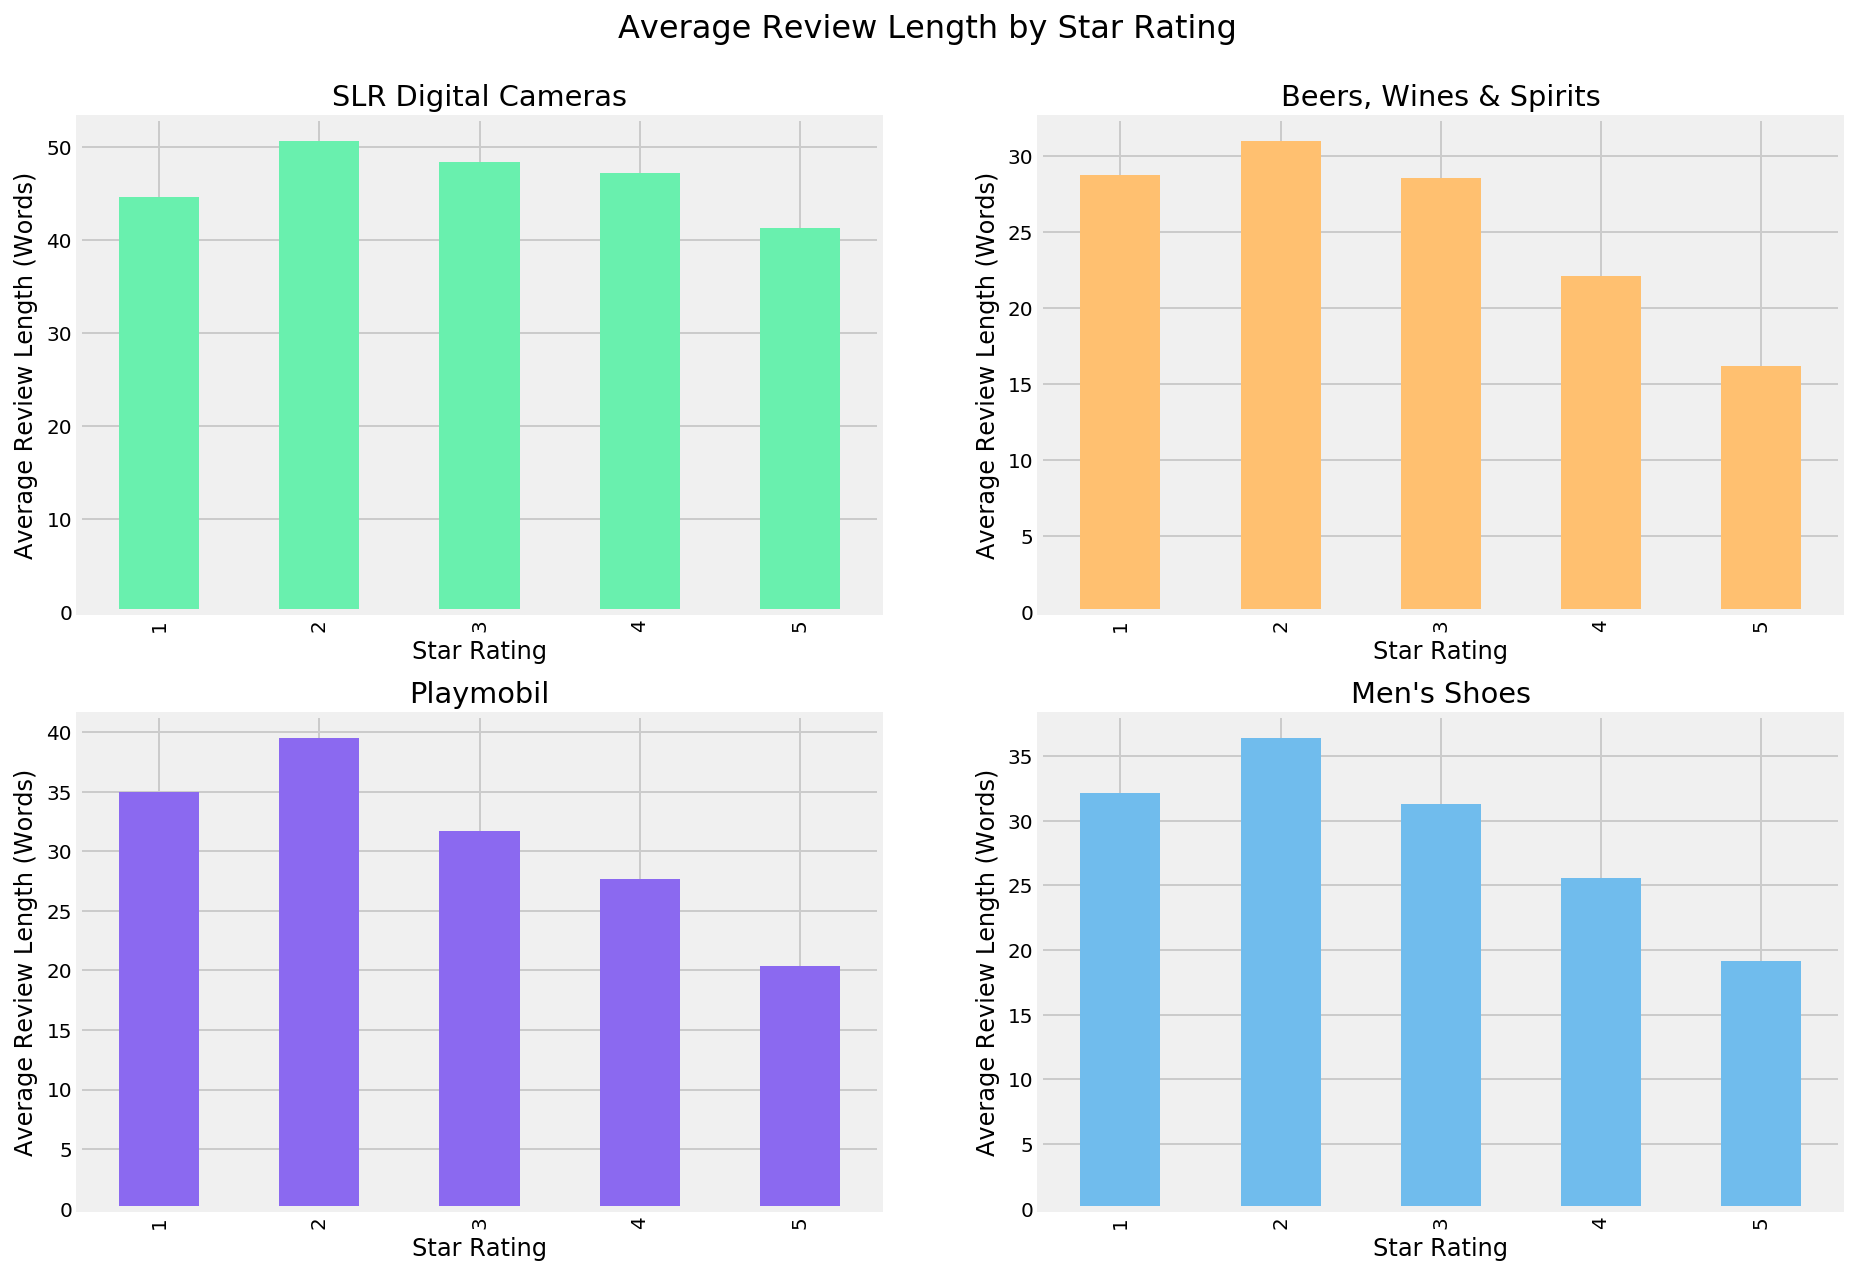
</div>

Looking at these distributions of star ratings against review lengths, it is clear that my hypothesis is incorrect, a peak in length at the 2 star ervie shows that a customer is more likely to leave a longer review for a product they just don't like, looking at the standard deviations of review lengths, there begins to be some difference accross category beginning to emerge.

<div style="width:900px;">
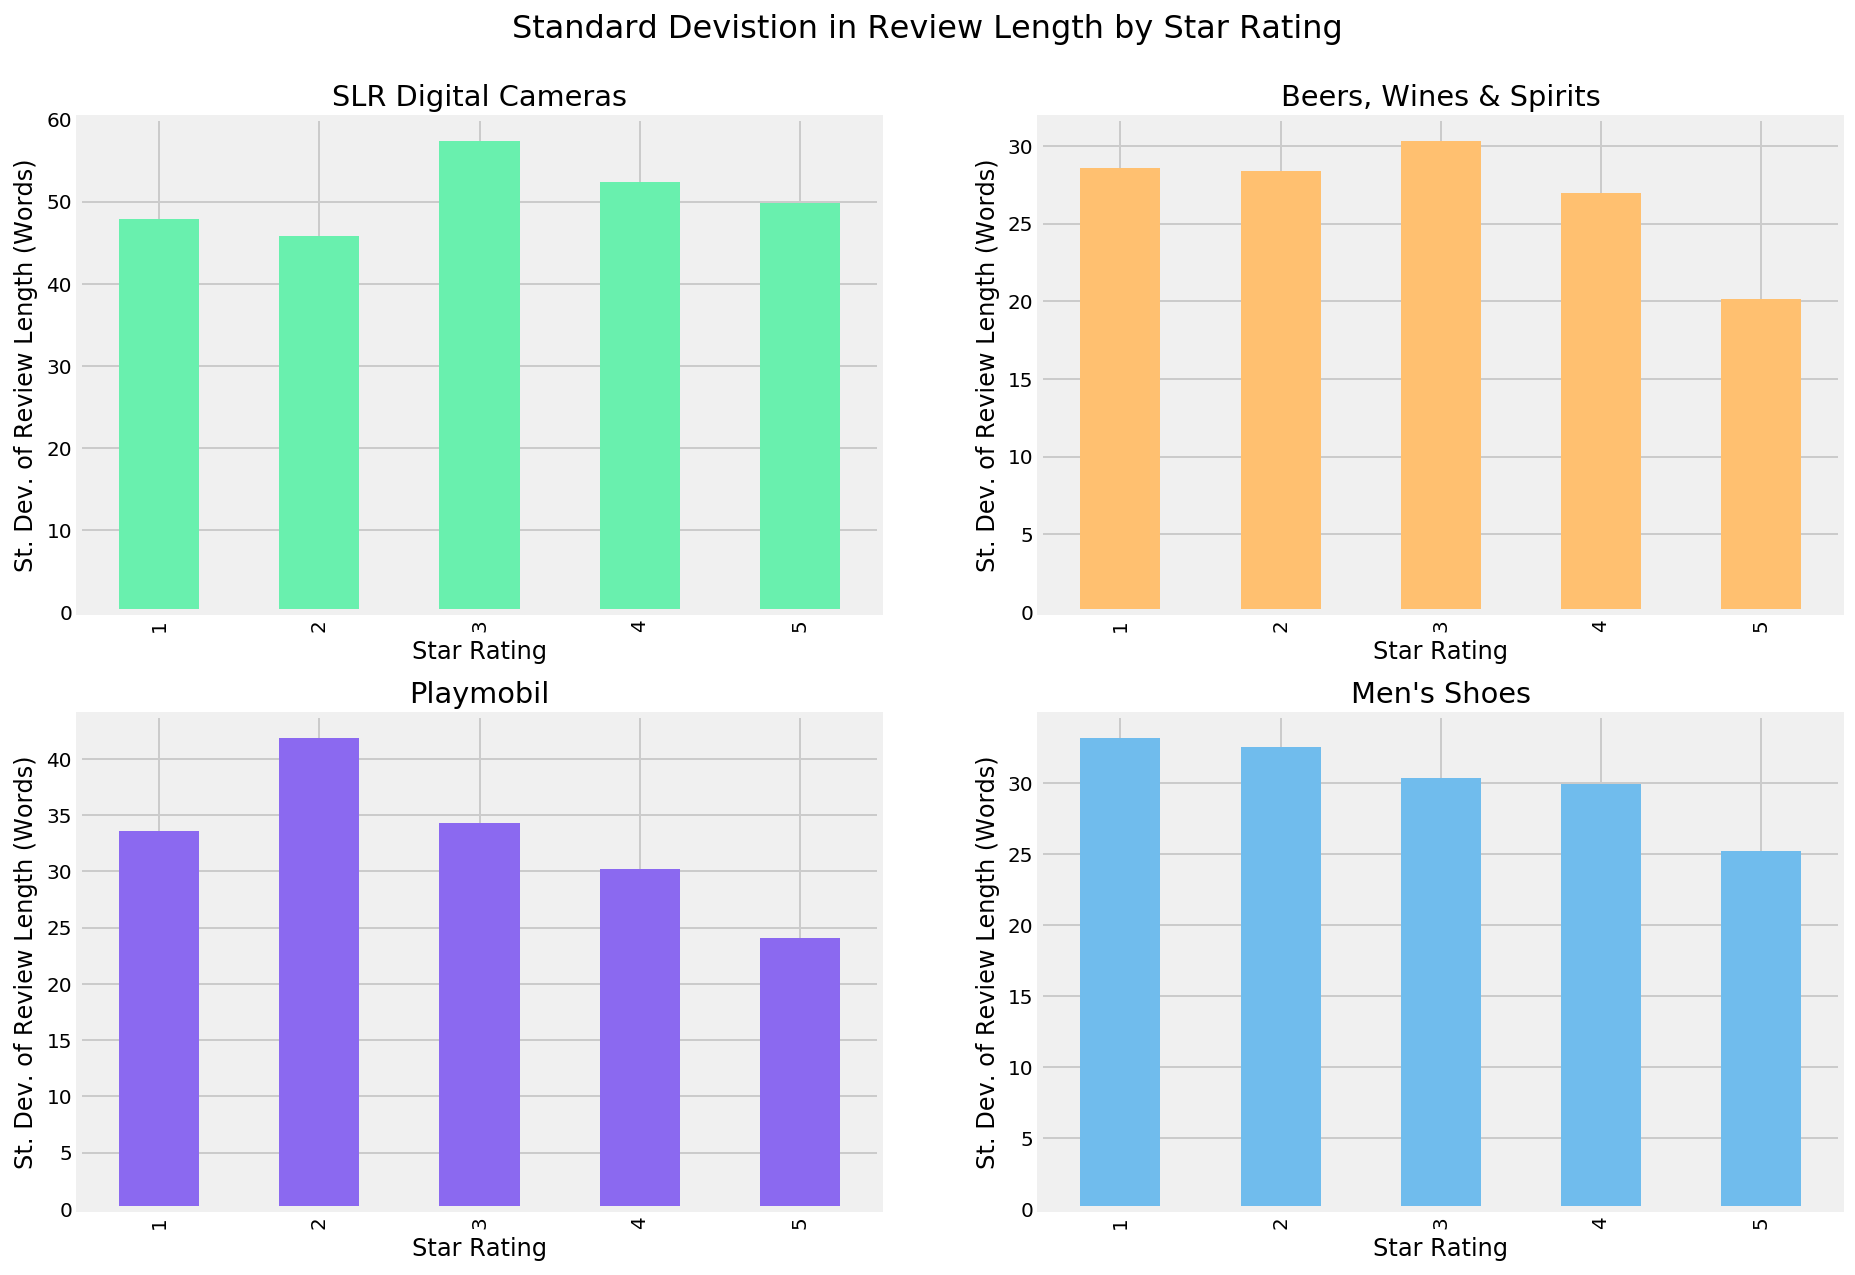
</div>

With needing to be able to make predicitons here, it is becoming difficult to see how I can find classes sufficiently different from each other to fit a classifier on. I have looked at the reactions that other customers have left for customer reviews.

## Utility

A Customer can mark a review as 'helpful' on Amazon, when they deem it to be helpful. I wondered if I could look at building a model to predict whether a review would be seen as helpful by other customers. Until more recently customers were able to mark reviews as helpful or unhelpful, this feature has unfortunately been removed. I will therefore be unable to classify whether a review is 'unhelpful', only that it is not yet considered helpful.


<div style="width:400px; margin-top:15px;">
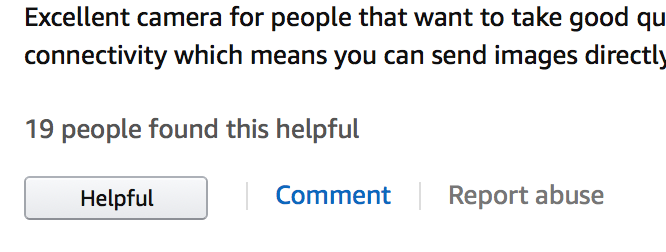
</div>

<div style="width:900px;">
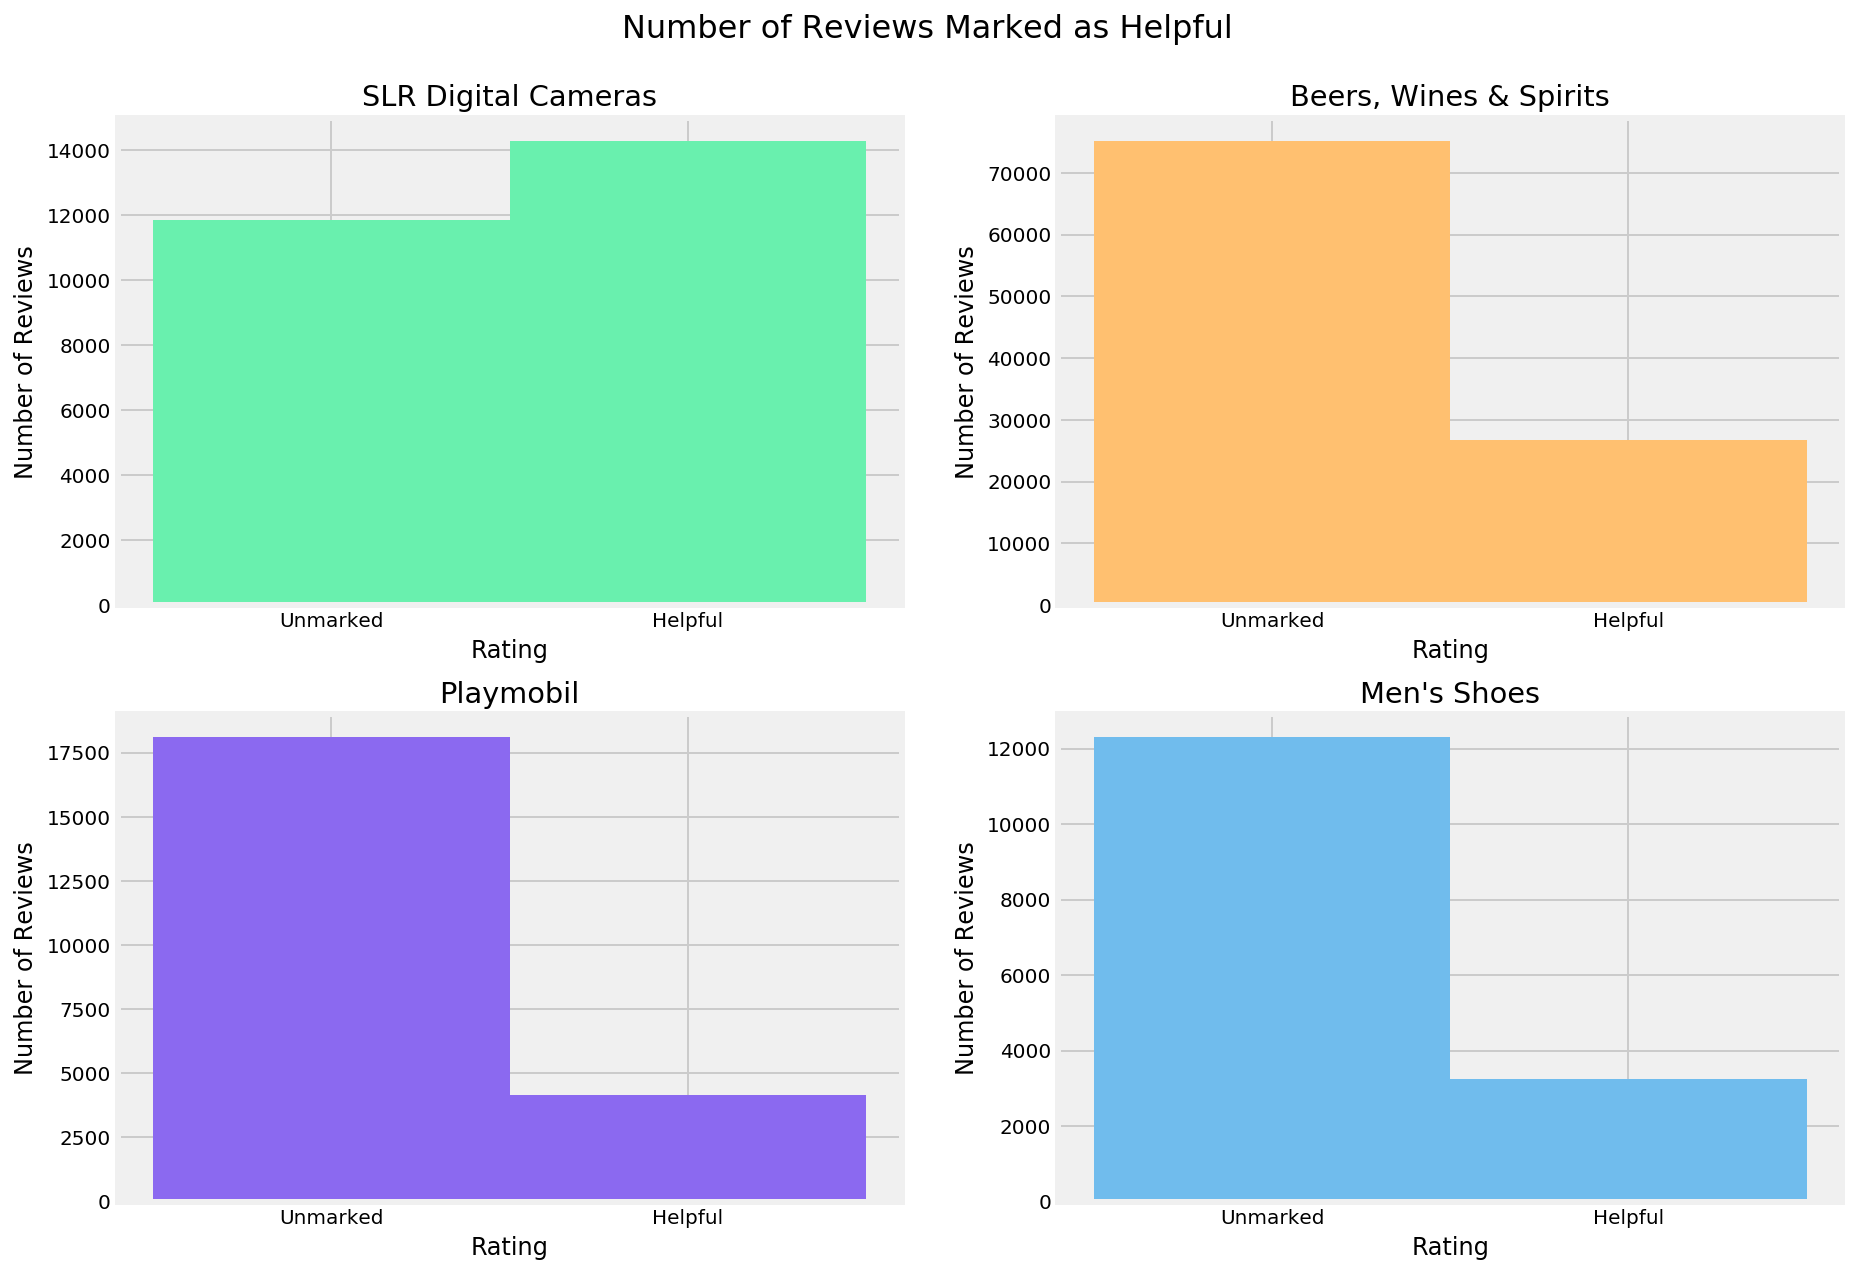
</div>

For the SLR Cameras, it looks like the classes are fairly evenly balanced enough to look at classification. There is however a hurdle to overcome here - it may be the case that a review could be incredibly useful objectively, but if noone has seen it to mark it as helpful, it would not appear as 'helpful' to our model.

## Feature Creation

Looking at the SLR dataset still, it can be seen that with certain feature addition, I can begin to discriminate more between a useful and non useful comment:
<div style="width: 600px;">
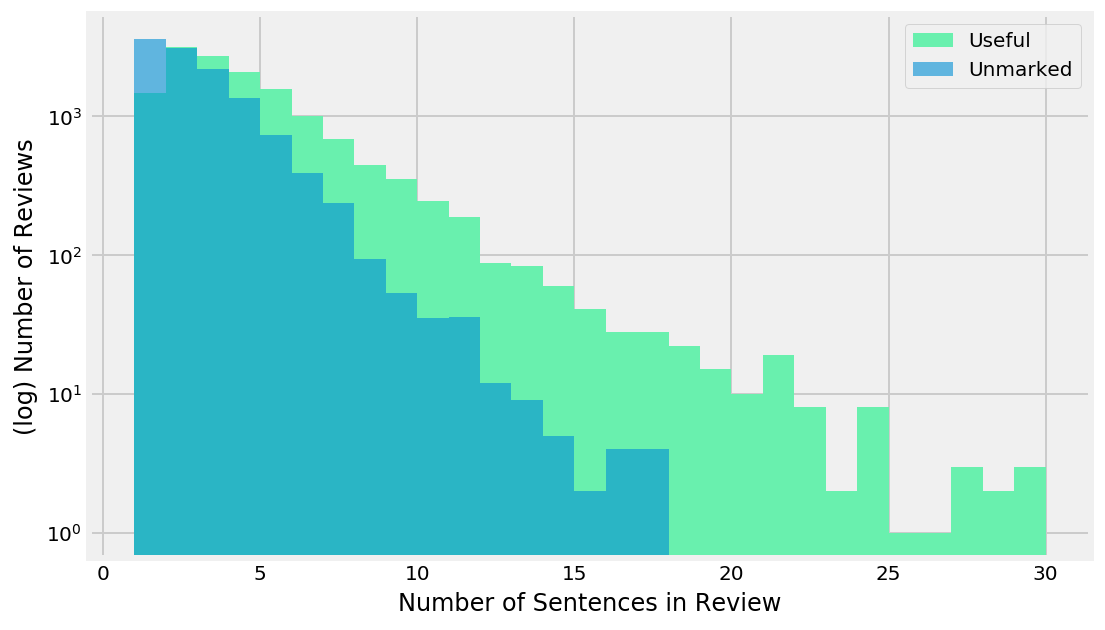
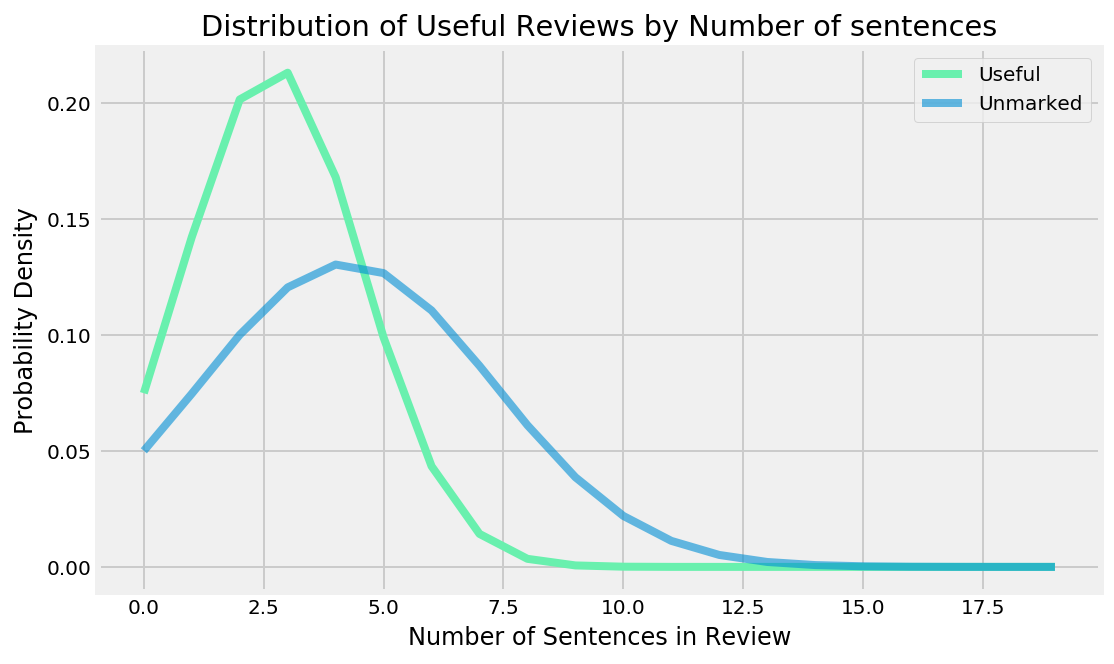
</div>

It looks like the shorter a review, the more likely it is to be considered useful - is this because people are more likely to read a shorter review?

Running a T-test here:
t stat = 50.262951846895106  
p value = 0.0  
the T-test shows that the means are definitely different for the two distributions

The Classes show a good portion of non overlapping, however some may not prove to display much signal:

<div style="width: 600px;">
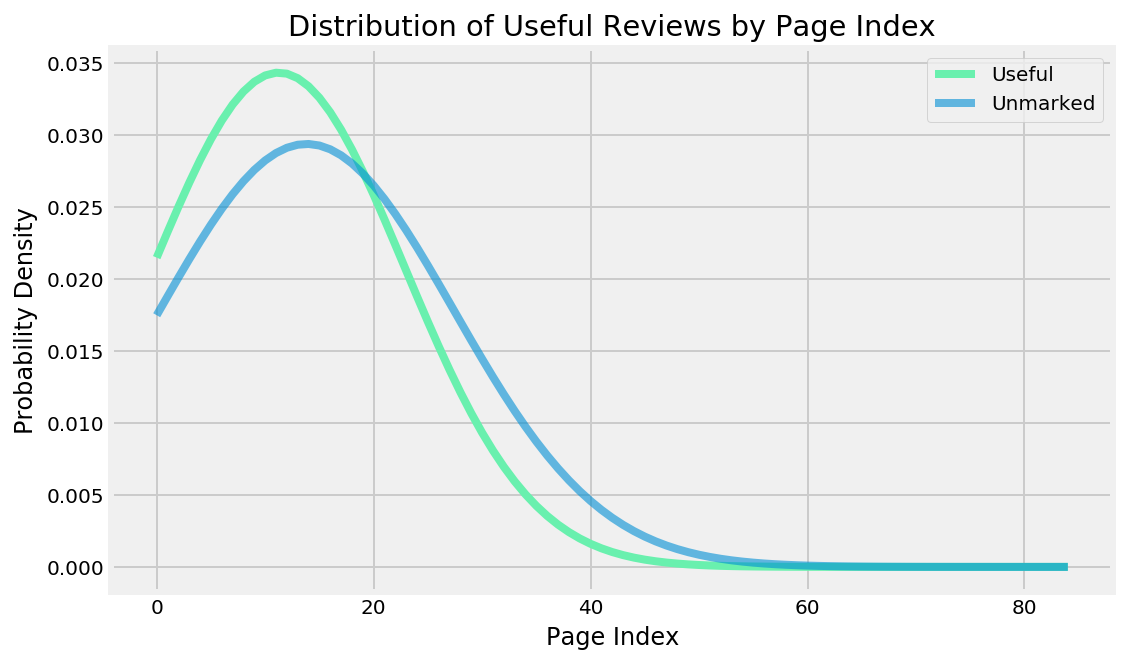
</div>

The page index here is how far through all the reviews for a product are by page, i.e. index one is the first page of reviews. It is however unclear how Amazon are indexing these pages, the reviews are not organised by date, stars, votes of helpfulness or any discernible pattern.

# Classification of Utility

Having begun fitting several different models on the SLR camera review utility, it is possible to classify useful comments, but all the models look to be producing accuracies at around 72% using hold out data cross validation (against a 53% baseline). 

I'm wondering if the classification of utility - whether a comment is useful or not may be a better measure to predict based on the reviews.

with a tf-idf vectorizer and logistic regression, an example classification report:

             precision    recall  f1-score   support

          0       0.76      0.74      0.75      2894
          1       0.80      0.81      0.80      3636

    avg / total   0.78      0.78      0.78      6530
    
Below I plot the ROC for the classifier, at a roughly 80% True Positive Rate, I am only predicting 20% False Positives - these may well be useful, but that is yet unconfirmed by a human

<div style="width:600px;">
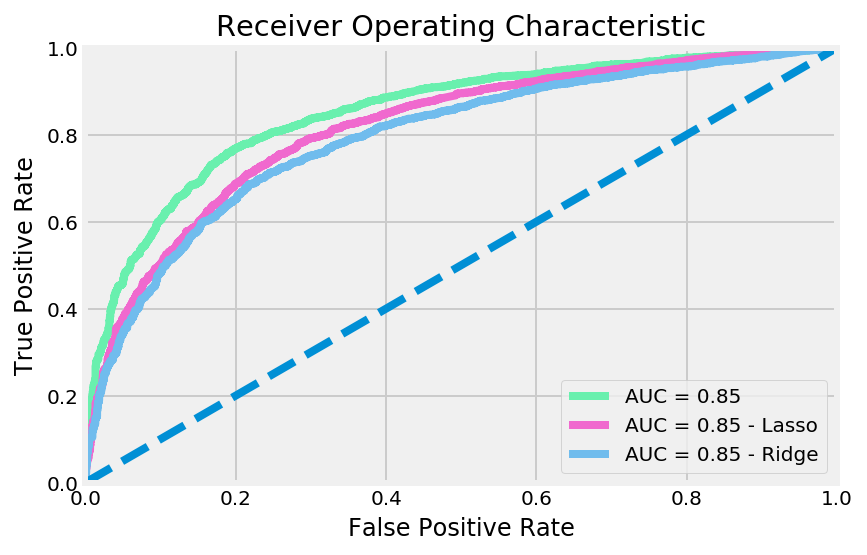
    
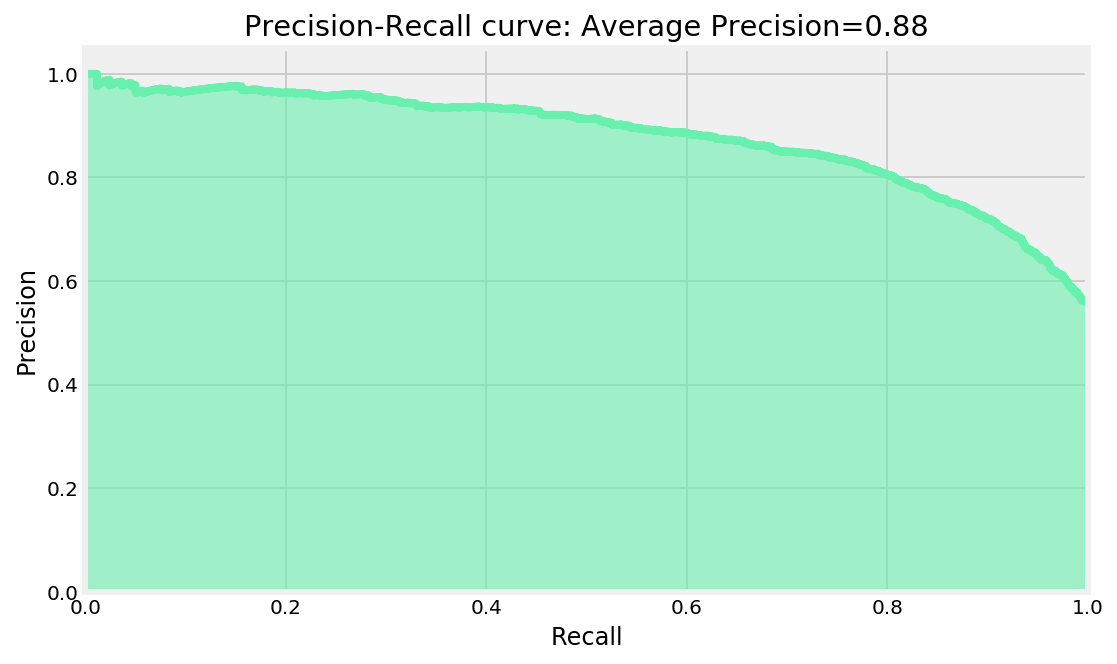
</div>

# Beginning to look at comment features

Using SPACY library to establish the breakdown of parts of speech within each comment:
<div style="width:600px;">   
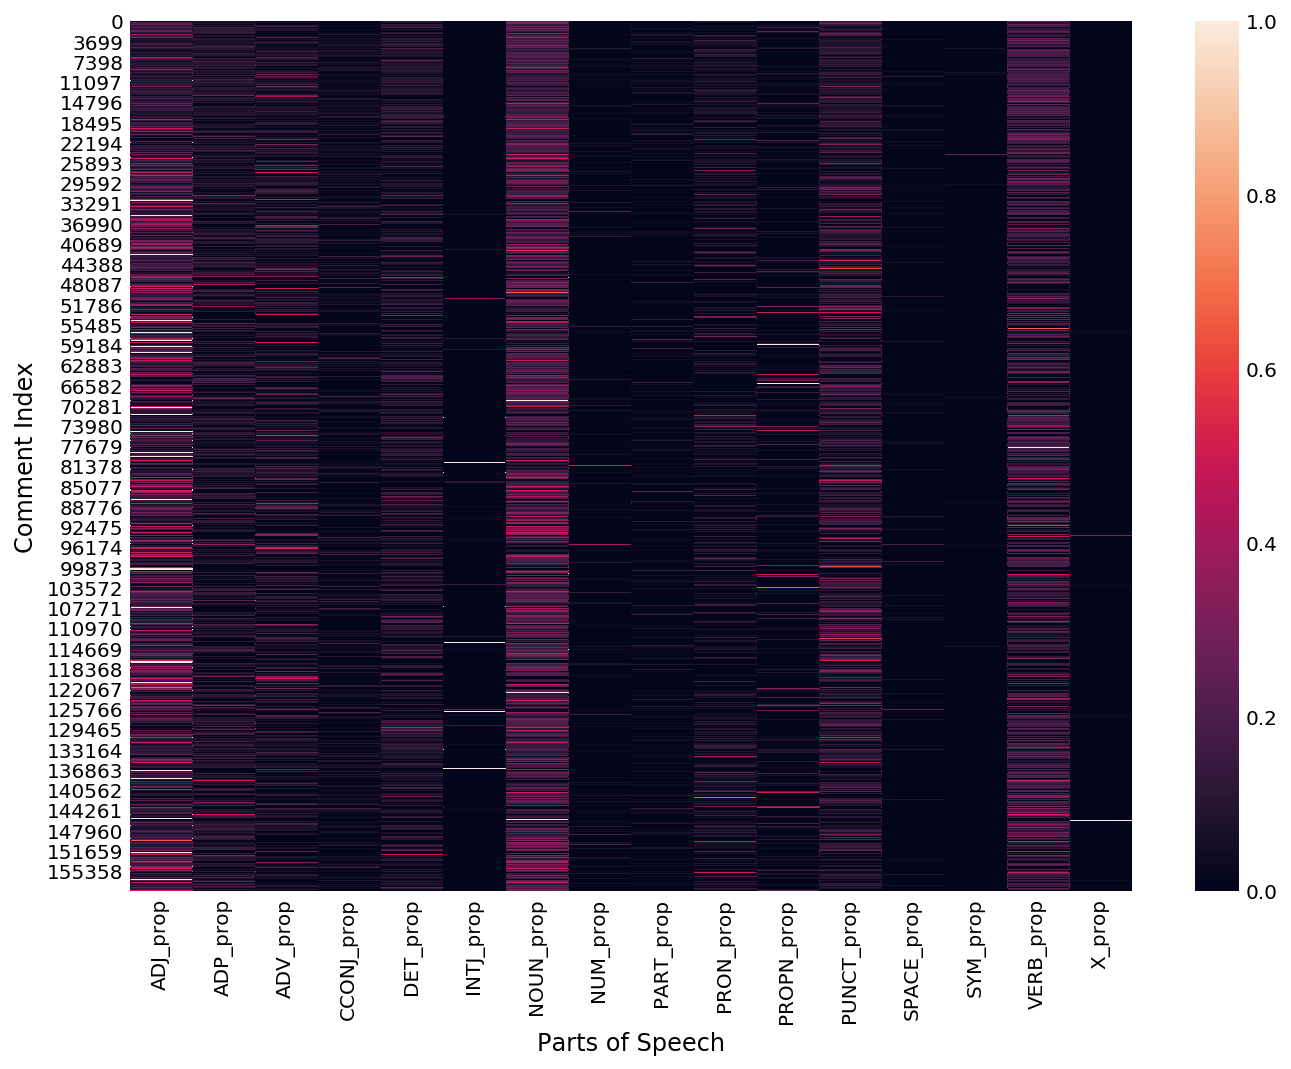
</div>

# Next Steps

I'm wondering if I might have plenty of data that could be used to build a tool that could be used as a review filtering input for Amazon.

Perhaps I could build a model that could be applied at the point of a user submitting a review, rather than a 'dumb' submit box, it could be used as an example of an input box that could give an indication of how useful a review in a category may prove to be, or whether it is deemed relevant enough to the product to be added to the corpus of reviews?

1. I need to be clear on the model I want to establish - I will be looking at modelling the topics of reviews to see if reviews that are strongly associated to a topic are seen as more useful
2. I need to generate more diferentiating features from the corpus of reviews
3. I need to test, test test!

## LDA

I have been investigating fitting an LDA (Latent Dirichlet Allocation) model on all the reviews, to establish if it is possible to predict the category that the comment is taken form, my thought sbeing this if the topic/category can be predicted, then the comment stands a greater chance of being seen as useful rather than a general comment about delivery.

In doing this, I will establish if there is any relationship between a comment belonging to an identified topic, and whether membership of that topic increases the probability that the review is considered useful.

I have tried with several methods in a pipeline to pick out words to model LDA on top of. I initially suspected that there would be 5 identifiable topics from the reviews - one per product category, and a general topic relating to delivery or service.

Given that LDA is an unsupervised algorithm, I set it going with 5 topics to identify, the reults were not entirely discouraging:

Topics, and top words in LDA (5 topic) model:
* Topic #0: camera playmobil little play just use like set don small easy quality used stuff bit say time really better lots  
* Topic #1: bought gift loves present loved christmas box bottle grandson son birthday lovely daughter amazing got amazon day hours enjoyed little  
* Topic #2: excellent old year year old perfect delivery great toy pleased happy playmobil fast shoes thank quick thanks fit comfortable running purchase  
* Topic #3: love nice taste drink like best gin whisky great lovely smooth bottle really flavour rum vodka favourite wine delicious sweet  
* Topic #4: good great price product value quality arrived money time really wine expected good value highly good price value money packaged fantastic good quality worth 

__topic 0__ contains camera and playmobil - so that needs more differentiation  
__topic 1__ indicates the comment is related to giving gifts - I realise now that playmobil and beers wines and spirits are both commonly given as gifts - albeit to different recipients (hopefully!)  
__topic 2__ mentions playmobil and shoes, more differentiation is required.  
__topic 3__ is a really well differentiated topic clearly related to beers, wines and spirits  
__topic 4__ heavily suggests a topic relating to delivery and service  

I will investigate more hyperparameters, and increasing the number of topics for the LDA to see if I can improve this identification - 

## Follow up

Initially I was thinking that I needed the topics to match exactly the topics that were associated with the categories, but this is false assumption. I should let the statistical properties speak for themselves